Санкт-Петербургский Государственный Политехнический Университет   
## Дисциплина: Вычислительная математика   
# **Лабораторная работа №2**

## Формулировка задания
![Формулировка задания](./meta/2.jpg)

## Теоретический материал
### Метод LU-декомпозиции и его применение в задаче
Метод LU-декомпозиции разложения матрицы A на две треугольные матрицы, L (нижнетреугольная) и U (верхнетреугольная), широко используется для численного решения систем линейных уравнений. В данной задаче используются функции lu_factor и lu_solve из библиотеки SciPy.
* lu_factor(A) выполняет разложение матрицы A в виде PA = LU, где P — матрица перестановок.
* lu_solve((lu, piv), b) использует LU-разложение для решения системы Ax = b.
В коде lu_factor(A) используется для получения разложения матрицы, после чего lu_solve применяется для решения системы Ax = b (x2).
### Вычисление обратной матрицы
Для нахождения x1 обратная матрица A^-1 вычисляется путем решения уравнений Ax_i = e_i, где e_i — столбцы единичной матрицы. Это выполняется с помощью lu_solve, примененного к каждому столбцу.
### Анализ обусловленности и погрешности
Число обусловленности матрицы A рассчитывается как cond(A) = ||A||*||A^-1|| с использованием np.linalg.cond(A, p=np.inf). Величина относительной ошибки показывает влияние ошибки численного решения.

## Таблица результатов вычислений для каждого значения параметра <b>p</b> и график зависимости относительной погрешности от числа обусловленности
> Код программы можно посмотреть в main.py

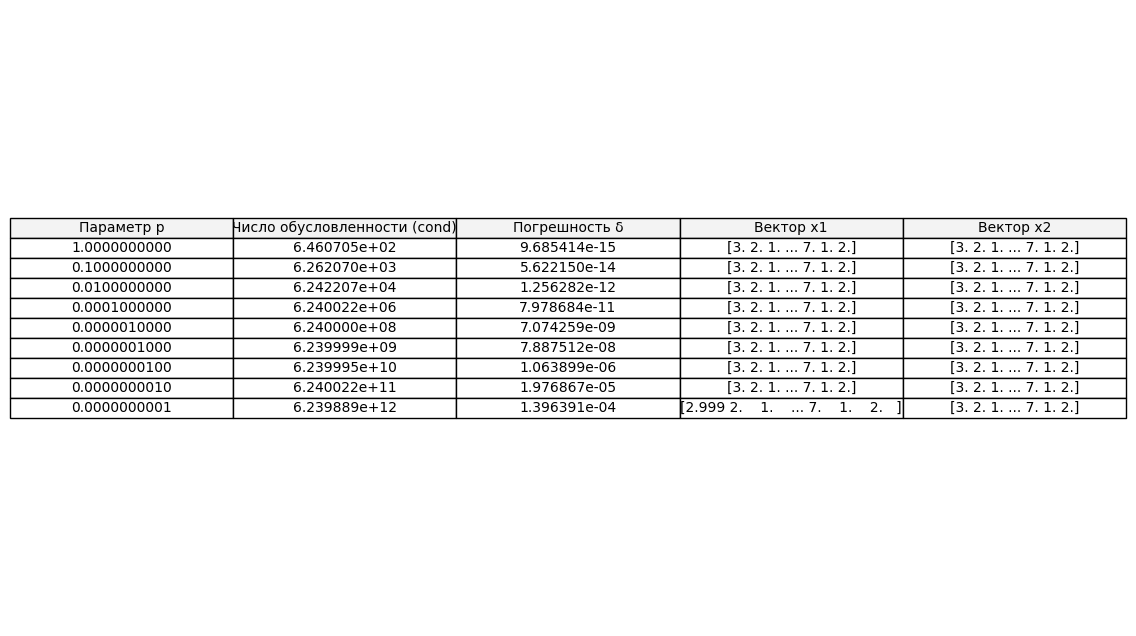

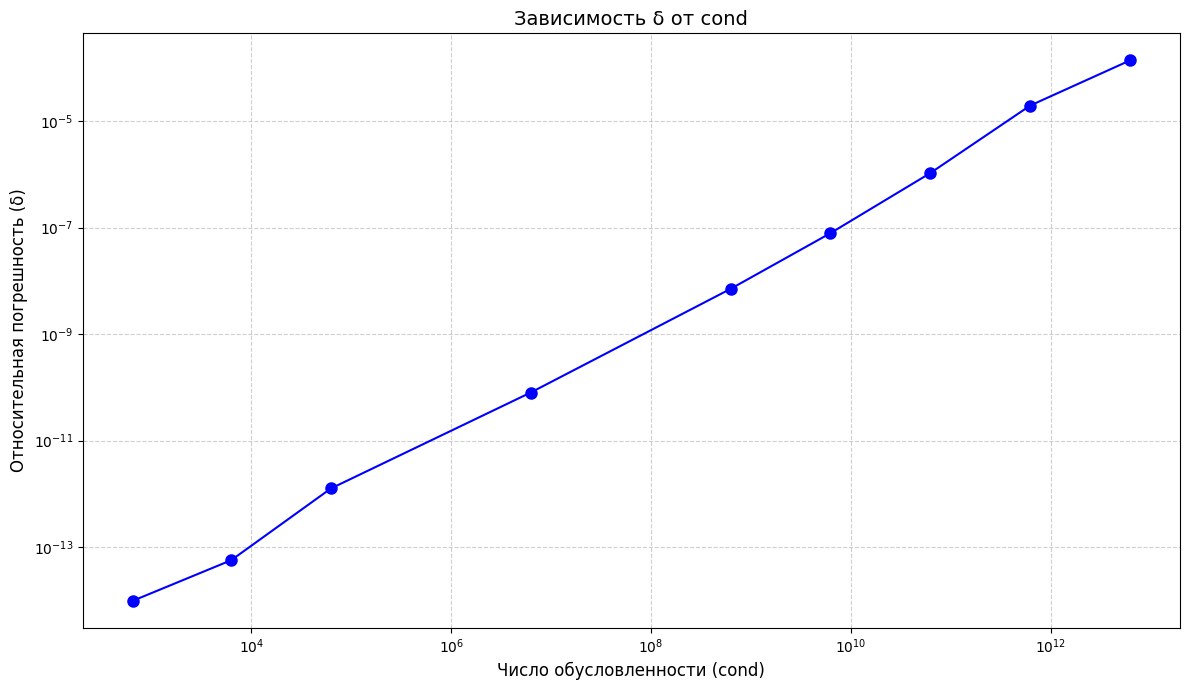

In [7]:
import numpy as np
from scipy.linalg import lu_factor, lu_solve
import matplotlib.pyplot as plt

p_values = [
    1.0, 0.1, 0.01, 0.0001, 0.000001,
    0.0000001, 0.00000001, 0.000000001, 0.0000000001
]

A_elements = np.array([
    [31, -7, -7, -4, -8, -4, -1, 0],
    [-7, 27, -4, -4, 0, -1, -4, -7],
    [-7, -4, 31, -8, -7, 0, -3, -2],
    [-4, -4, -8, 39, -4, -7, -7, -5],
    [-8, 0, -7, -4, 29, -7, -2, -1],
    [-4, -1, 0, -7, -7, 25, -1, -5],
    [-1, -4, -3, -7, -2, -1, 20, -2],
    [0, -7, -2, -5, -1, -5, -2, 22]
], dtype=float)

b_elements = np.array([-29, -28, -104, 198, 29, 59, -71, -54], dtype=float)

results = []

for p in p_values:
    A = A_elements.copy()
    A[0, 0] += p

    b = b_elements.copy()
    b[0] += 3 * p

    # LU-декомпозиция
    lu, piv = lu_factor(A)
    x2 = lu_solve((lu, piv), b)

    # Вычисление обратной матрицы
    n = A.shape[0]
    I = np.eye(n)
    A_inv = np.zeros_like(A)
    for i in range(n):
        A_inv[:, i] = lu_solve((lu, piv), I[:, i])

    x1 = A_inv @ b

    # Число обусловленности и погрешность
    cond_A = np.linalg.cond(A, p=np.inf)
    delta = np.linalg.norm(x1 - x2) / np.linalg.norm(x1)

    results.append((p, cond_A, delta, x1, x2))

# Формируем данные для таблицы
table_data = []
for p, cond, delta, x1, x2 in results:
    x1_str = np.array2string(x1, precision=3, suppress_small=True, threshold=4)
    x2_str = np.array2string(x2, precision=3, suppress_small=True, threshold=4)
    table_data.append([
        f"{p:.10f}",
        f"{cond:.6e}",
        f"{delta:.6e}",
        x1_str,
        x2_str
    ])

# Заголовки таблицы
headers = ["Параметр p", "Число обусловленности (cond)", "Погрешность δ", "Вектор x1", "Вектор x2"]

# Создаем изображение таблицы
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('off')

# Создаем таблицу
table = ax.table(
    cellText=table_data,
    colLabels=headers,
    loc='center',
    cellLoc='center',
    colColours=['#f3f3f3'] * len(headers)  # Цвет фона заголовков
)

# Настройка стиля таблицы
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Масштабирование таблицы

# Сохраняем таблицу как изображение
plt.savefig("table_output.png", bbox_inches='tight', dpi=300)
plt.show()

# Построение графика
conds = [res[1] for res in results]
deltas = [res[2] for res in results]

plt.figure(figsize=(12, 7))
plt.plot(conds, deltas, 'bo-', markersize=8)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Число обусловленности (cond)', fontsize=12)
plt.ylabel('Относительная погрешность (δ)', fontsize=12)
plt.title('Зависимость δ от cond', fontsize=14)
plt.grid(True, which="both", linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig("plot_output.png", bbox_inches='tight', dpi=300)
plt.show()

## Вывод
Была написана программа, решающая поставленную задачу. Программа составляет таблицу искомых характеристик для каждого значения <b>p</b>, а также строит график зависимости относительной погрешности от числа обусловленности.    
В задаче исследуется влияние малого изменения параметра <b>p</b> на обусловленность системы и точность решения. Чем больше число обусловленности, тем больше влияние ошибок округления, что видно на графике зависимости δ от cond(A).